In [1]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


## Incarcam datele

In [ ]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')

print('Primele inputuri (Family):', inputs[:5])
print('Primele outputuri (Happiness.Score):', outputs[:5])

inputs2, outputs2 = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

Primele inputuri (Family): [1.53352356, 1.551121593, 1.610574007, 1.516911745, 1.540246725]
Primele outputuri (Happiness.Score): [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]
in:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


## Afisam distributia datelor si verificam liniaritatea

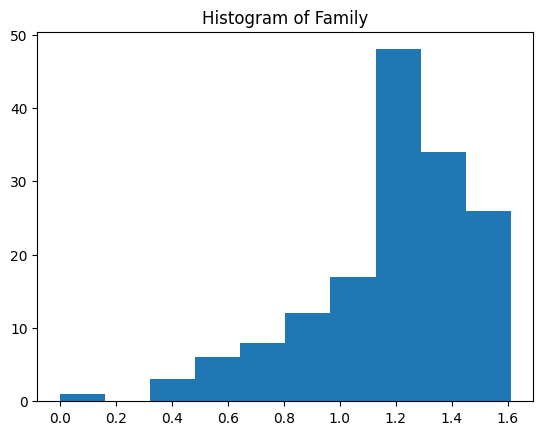

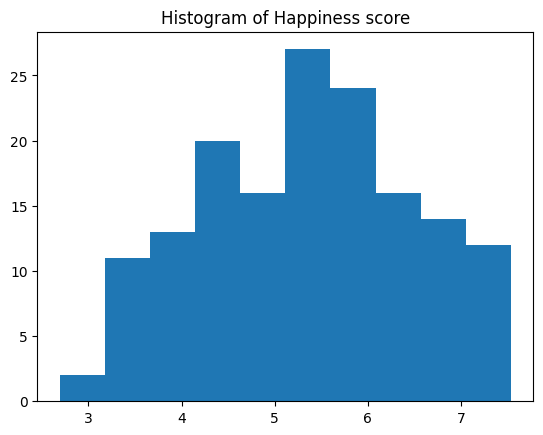

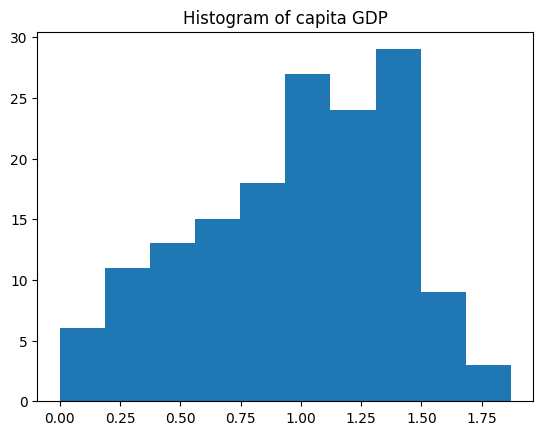

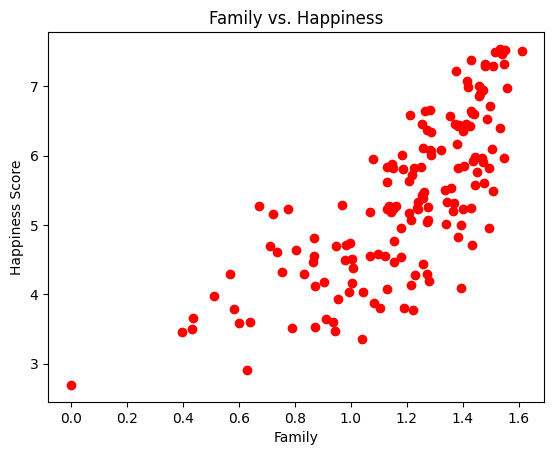

In [3]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'Family')
plotDataHistogram(outputs, 'Happiness score')

plotDataHistogram(inputs2, 'capita GDP')

# verificare relatie liniara
plt.plot(inputs, outputs, 'ro') 
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Family vs. Happiness')
plt.show()

## Impartim datele in antrenare si validare (pentru GDP-input2, pentru Family-input)

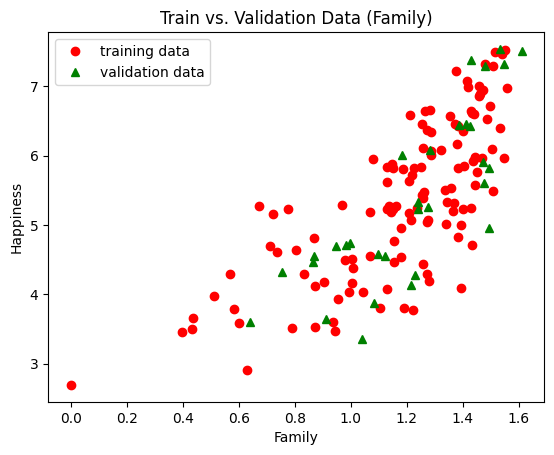

In [4]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
validationSample = [i for i in indexes if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(validationInputs, validationOutputs, 'g^', label='validation data')
plt.title('Train vs. Validation Data (Family)')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.legend()
plt.show()

## Antrenam modelul cu sklearn

In [5]:
xx = [[el] for el in trainInputs]
regressor = linear_model.LinearRegression()
regressor.fit(xx, trainOutputs)

w0, w1 = regressor.intercept_, regressor.coef_[0]
print('Model invatat: f(x) =', w0, '+', w1, '* x')

Model invatat: f(x) = 2.039013930022846 + 2.804913617557077 * x


## Afișăm modelul învățat pe train data

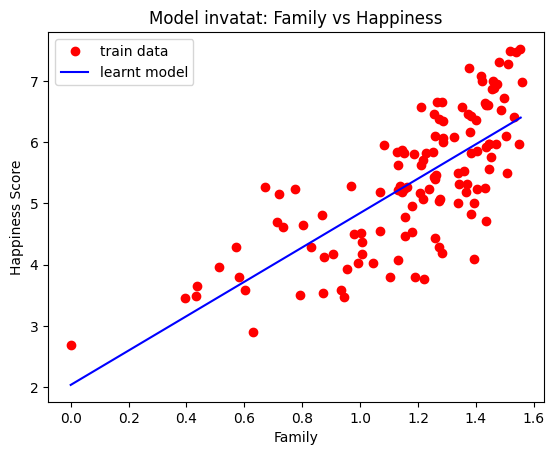

In [6]:
# construim linia modelului invatat
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / 1000
for i in range(1, 1000):
    xref.append(val)
    val += step

yref = [w0 + w1 * x for x in xref]


plt.plot(trainInputs, trainOutputs, 'ro', label='train data')
plt.plot(xref, yref, 'b-', label='learnt model')
plt.title('Model invatat: Family vs Happiness')
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

## Pasul 6: Prezicem și evaluăm eroarea pe validation set

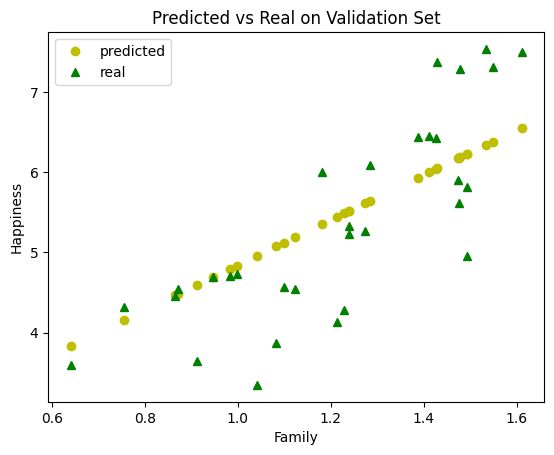

Eroare predictie (manual): 0.6051231125473607
Eroare predictie (tool): 0.6051231125473606


In [7]:
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

plt.plot(validationInputs, computedValidationOutputs, 'yo', label='predicted')
plt.plot(validationInputs, validationOutputs, 'g^', label='real')
plt.title('Predicted vs Real on Validation Set')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.legend()
plt.show()



error_manual = sum((t1 - t2) ** 2 for t1, t2 in zip(computedValidationOutputs, validationOutputs)) / len(validationOutputs)
error_tool = mean_squared_error(validationOutputs, computedValidationOutputs)

print("Eroare predictie (manual):", error_manual)
print("Eroare predictie (tool):", error_tool)

## Problema pentru regresie bivariata (GDP si Freedom)

In [8]:
def loadData(fileName, inputVars, outputVar):
    data = []
    dataNames = []
    
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    
    inputIndexes = [dataNames.index(var) for var in inputVars]
    outputIndex = dataNames.index(outputVar)
    
    inputs = []
    outputs = []
    
    for row in data:
        try:
            inputRow = [float(row[i]) for i in inputIndexes]
            outputValue = float(row[outputIndex])
            inputs.append(inputRow)
            outputs.append(outputValue)
        except ValueError:
            continue  # Skip rows with missing or non-numeric values
    
    return inputs, outputs


In [ ]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')
inputVars = ['Economy..GDP.per.Capita.', 'Freedom']
outputVar = 'Happiness.Score'

inputs, outputs = loadData(filePath, inputVars, outputVar)

#Split data
np.random.seed(42)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

#Train model
regressor = linear_model.LinearRegression()
regressor.fit(trainInputs, trainOutputs)

w0 = regressor.intercept_
w1, w2 = regressor.coef_
print(f"Model: Happiness = {w0:.3f} + {w1:.3f} * GDP + {w2:.3f} * Freedom")

#Predict on test data
predictedTestOutputs = regressor.predict(testInputs)

#Compute error
error = mean_squared_error(testOutputs, predictedTestOutputs)
print(f"Prediction error: {error:.4f}")

Model: Happiness = 3.223 + -15595512.068 * GDP + 31191028.537 * Freedom
Prediction error: 0.4870


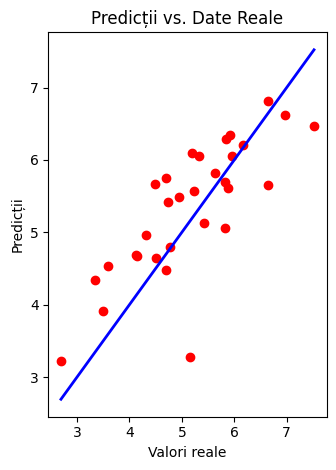

In [ ]:
#Predicții vs. date reale pentru test
plt.subplot(1, 2, 1)
plt.scatter(testOutputs, predictedTestOutputs, color='red')
plt.plot([min(testOutputs), max(testOutputs)], [min(testOutputs), max(testOutputs)], color='blue', lw=2)
plt.xlabel('Valori reale')
plt.ylabel('Predicții')
plt.title('Predicții vs. Date Reale')

plt.tight_layout()
plt.show()
